In [280]:
import numpy as np
import matplotlib.pyplot as plt

import decimal


# decimal.getcontext().prec = 5

In [281]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    y = []
    for i in A2:
        for k in x_o:
            for j in A3:
                b = A1 + (i - A1)/(1+np.exp((x-k)/j))
                a.append(b)
                y.append([i , j, k])
    return(np.array(a), np.array(y))

In [282]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [283]:
A2 = 700
A3 = .5
x_o = 22

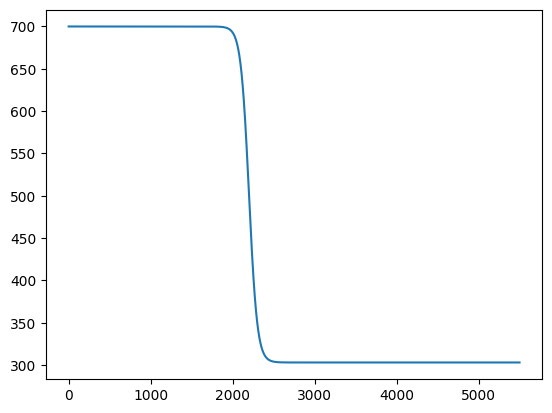

In [284]:
plt.plot(bolts_int(A2, A3, x, x_o))

In [285]:
A2 = np.linspace(303, 773, 25)
A3 = np.linspace(0.1, 1, 5)
x_o = np.linspace(1, 55, 50)
x = np.linspace(0, 55, 5500)

# mol = np.linspace(.1, 0.3, 10)

In [286]:
x_o

array([ 1.        ,  2.10204082,  3.20408163,  4.30612245,  5.40816327,
        6.51020408,  7.6122449 ,  8.71428571,  9.81632653, 10.91836735,
       12.02040816, 13.12244898, 14.2244898 , 15.32653061, 16.42857143,
       17.53061224, 18.63265306, 19.73469388, 20.83673469, 21.93877551,
       23.04081633, 24.14285714, 25.24489796, 26.34693878, 27.44897959,
       28.55102041, 29.65306122, 30.75510204, 31.85714286, 32.95918367,
       34.06122449, 35.16326531, 36.26530612, 37.36734694, 38.46938776,
       39.57142857, 40.67346939, 41.7755102 , 42.87755102, 43.97959184,
       45.08163265, 46.18367347, 47.28571429, 48.3877551 , 49.48979592,
       50.59183673, 51.69387755, 52.79591837, 53.89795918, 55.        ])

In [287]:
a2 = bolts(A2, A3, x, x_o)

In [288]:
e1, e2 = a2

In [289]:
e1 = np.array(e1)

In [290]:
e2 = np.array(e2)

In [291]:
e1

array([[303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       ...,
       [773.        , 773.        , 773.        , ..., 542.27303325,
        540.13669325, 538.        ],
       [773.        , 773.        , 773.        , ..., 541.03264112,
        539.5163837 , 538.        ],
       [773.        , 773.        , 773.        , ..., 540.35034898,
        539.17520388, 538.        ]])

In [292]:
e2

array([[3.03e+02, 1.00e-01, 1.00e+00],
       [3.03e+02, 3.25e-01, 1.00e+00],
       [3.03e+02, 5.50e-01, 1.00e+00],
       ...,
       [7.73e+02, 5.50e-01, 5.50e+01],
       [7.73e+02, 7.75e-01, 5.50e+01],
       [7.73e+02, 1.00e+00, 5.50e+01]])

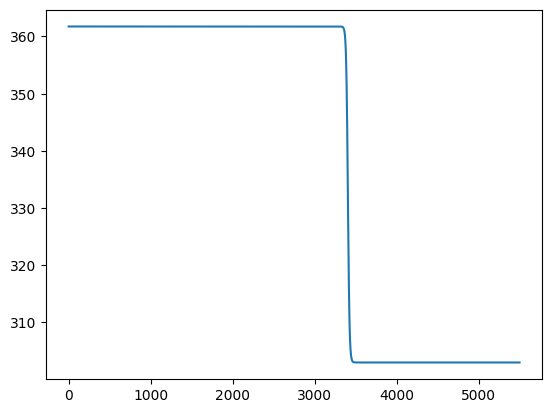

In [293]:
plt.plot(e1[900])

In [294]:
from scipy import signal

r1 = []
for i in e1:
    downsampled =  signal.resample(i, 1000)
    r1.append(downsampled)

r1 = np.array(r1).astype(np.half)

In [295]:
r1.shape

(6250, 1000)

In [296]:
np.save('final_profile', r1)

In [297]:
np.save('final_param', e2)